In [1]:
# working with ELG_full_all_vtest downloaded on March 12
%matplotlib inline
import matplotlib.pyplot as plt
import os 
import sys
import fitsio as ft
import numpy as np
import healpy as hp

In [2]:
sys.path.append('/global/homes/m/mehdi/github/DESILSS')
from syslss import hpixsum

In [3]:
# Anand sys map in nside of 256
nside=256

In [ ]:
# # read data
# data = ft.read('$SCRATCH/eboss/ebossv5_10_7/march12/eBOSS_ELG_full_ALL_vtest.dat.fits', 
#                lower=True, columns=['ra', 'dec'])
# # print(data.dtype.names)
# elgmap = hpixsum(nside, data['ra'], data['dec'])

# # backup elgmap
# hp.write_map('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/hp-elg256.fits', elgmap, fits_IDL=False)

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


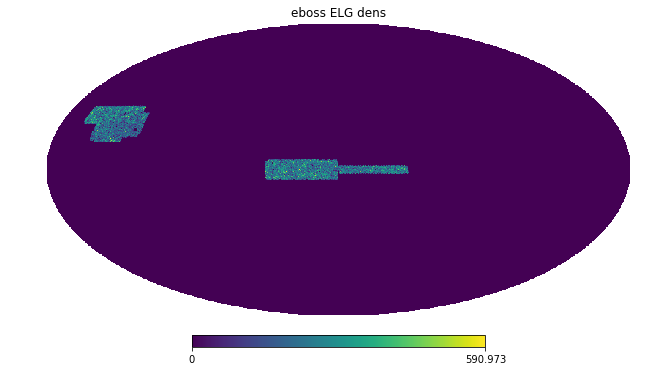

In [4]:
# read elg hp map
elghp = hp.read_map('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/hp-elg256.fits')
hp.mollview(elghp/hp.nside2pixarea(nside, degrees=True), title='eboss ELG dens')

In [7]:
# # read random
# random = ft.read('$SCRATCH/eboss/ebossv5_10_7/march12/eBOSS_ELG_full_ALL_vtest.ran.fits', 
#                lower=True, columns=['ra', 'dec', 'probanymask'])
# ranmap = hpixsum(nside, random['ra'], random['dec'], value=1-random['probanymask'])
# hp.write_map('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/hp-ran256.fits', ranmap, fits_IDL=False)

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


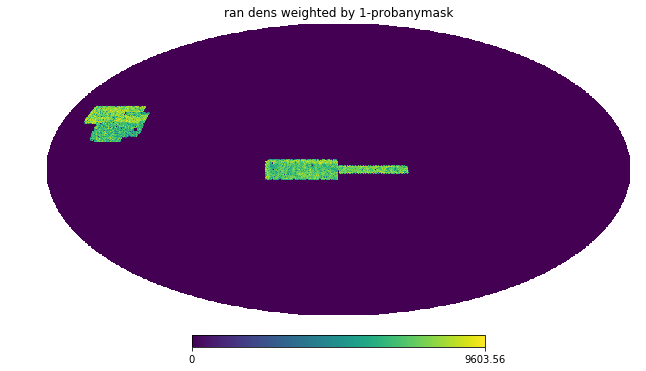

In [5]:
ranhp = hp.read_map('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/hp-ran256.fits')
hp.mollview(ranhp/hp.nside2pixarea(nside, degrees=True), title='ran dens weighted by 1-probanymask')

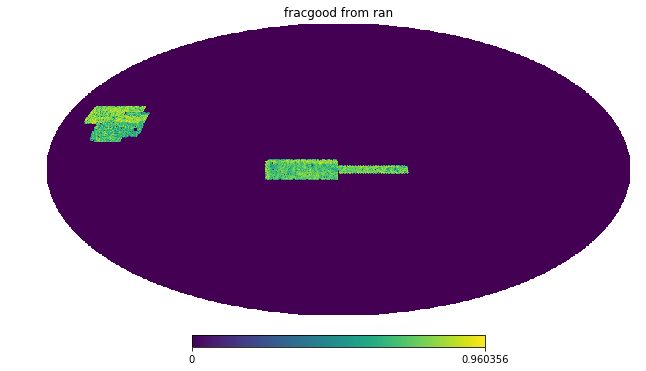

In [6]:
fracgood = ranhp / (10000*hp.nside2pixarea(nside, degrees=True))  # 10000 randoms per deg2
hp.mollview(fracgood, title='fracgood from ran')

In [7]:
# read sysmaps WO NDET
syscols = ['hpstardens', 'hpstardensfit', 'hpebv', 
           'hppsfsize_g', 'hppsfsize_r', 'hppsfsize_z', 
           'hppsfdepth_g', 'hppsfdepth_r', 'hppsfdepth_z', 
           'hpgaldepth_g', 'hpgaldepth_r', 'hpgaldepth_z']
sysmaps = ft.read('$SCRATCH/eboss/ELG_systhp.nside256.fits', lower=True, columns=['hpind']+syscols)
sysmaps.dtype.names, sysmaps.size

(('hpind',
  'hpstardens',
  'hpstardensfit',
  'hpebv',
  'hppsfsize_g',
  'hppsfsize_r',
  'hppsfsize_z',
  'hppsfdepth_g',
  'hppsfdepth_r',
  'hppsfdepth_z',
  'hpgaldepth_g',
  'hpgaldepth_r',
  'hpgaldepth_z'),
 786432)

In [8]:
# check if the ordering is right
np.array_equal(sysmaps['hpind'], np.arange(12*256**2))

True

In [9]:
len(syscols)

12

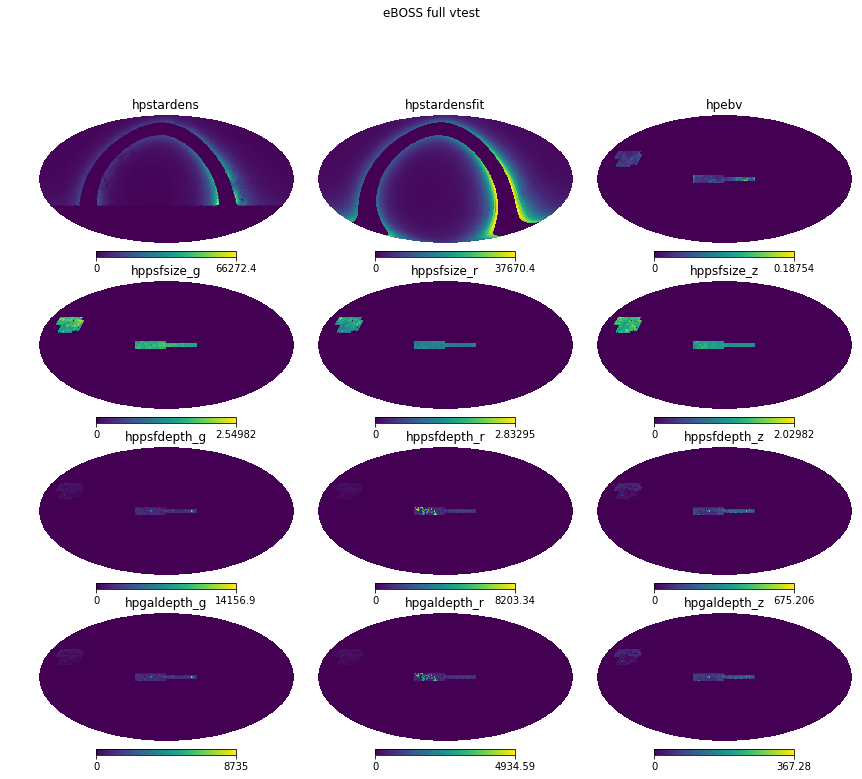

In [10]:
f,a = plt.subplots(ncols=3, nrows=5, figsize=(15, 15))
plt.suptitle("eBOSS full vtest")
a = a.flatten()
f.delaxes(a[-1])
f.delaxes(a[-2])
f.delaxes(a[-3])
plt.subplots_adjust(hspace=.1, wspace=.0)
for i,sys_n in enumerate(syscols):
    plt.axes(a[i])
    hp.mollview(sysmaps[sys_n], title=sys_n, hold=True)

In [31]:
# # check if there is any nan value
# for sys_n in syscols:
#     assert (np.isnan(sysmaps[sys_n])).sum() == 0

In [11]:
arg = fracgood > 0.2
syslists = [fracgood[arg]]
for i,sys_n in enumerate(syscols):
    syslists.append(sysmaps[sys_n][arg])
allsysmaps = np.column_stack(syslists)

In [12]:
# select number of galaxies in each pixel as label
label = elghp[arg] / fracgood[arg]
# select healpix indices as hpix
hpix = np.argwhere(arg).flatten()
# initialize the structured numpy array
outdata = np.zeros(allsysmaps.shape[0], 
                   dtype=[('hpix','i8'), ('features',('f8', allsysmaps.shape[1])), ('label','f8')]
                  )
outdata['hpix'] = hpix
outdata['features'] = allsysmaps
outdata['label']  = label
outdata[:3]

array([ (182134, [  2.19152544e-01,   1.62875061e+03,   1.54450867e+03,   2.85013299e-02,   1.56679511e+00,   1.77053785e+00,   1.30233991e+00,   6.35775757e+02,   1.78849533e+02,   5.84927864e+01,   4.19214996e+02,   1.15307465e+02,   3.41758499e+01],   9.12606336),
       (182135, [  4.79241989e-01,   1.55011304e+03,   1.54462036e+03,   2.98478454e-02,   1.69203997e+00,   1.76307750e+00,   1.35707593e+00,   6.40937866e+02,   1.80807419e+02,   6.22348289e+01,   4.27387604e+02,   1.15379524e+02,   3.56097946e+01],  18.77965664),
       (182136, [  6.43747649e-01,   1.55011304e+03,   1.49298950e+03,   2.96324007e-02,   2.14468670e+00,   1.65722656e+00,   1.43300605e+00,   3.59312683e+02,   2.13622147e+02,   3.11709824e+01,   2.83430664e+02,   1.16007019e+02,   1.92314548e+01],  23.30105599)],
      dtype=[('hpix', '<i8'), ('features', '<f8', (13,)), ('label', '<f8')])

In [13]:
# check nan
np.isnan(outdata['features']).sum()

0

In [14]:
labels = ['fracgood'] + syscols
labels

['fracgood',
 'hpstardens',
 'hpstardensfit',
 'hpebv',
 'hppsfsize_g',
 'hppsfsize_r',
 'hppsfsize_z',
 'hppsfdepth_g',
 'hppsfdepth_r',
 'hppsfdepth_z',
 'hpgaldepth_g',
 'hpgaldepth_r',
 'hpgaldepth_z']

In [15]:
ft.write('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/ngal-feat-256-wo-ndet.fits',
         outdata, header=dict(features = labels))

In [16]:
outdata, h = ft.read('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/ngal-feat-256-wo-ndet.fits', header=True)
h


XTENSION= 'BINTABLE'           / binary table extension
BITPIX  =                    8 / 8-bit bytes
NAXIS   =                    2 / 2-dimensional binary table
NAXIS1  =                  120 / width of table in bytes
NAXIS2  =                22357 / number of rows in table
PCOUNT  =                    0 / size of special data area
GCOUNT  =                    1 / one data group (required keyword)
TFIELDS =                    3 / number of fields in each row
TTYPE1  = 'hpix    '           / label for field   1
TFORM1  = 'K       '           / data format of field: 8-byte INTEGER
TTYPE2  = 'features'           / label for field   2
TFORM2  = '13D     '           / data format of field: 8-byte DOUBLE
TTYPE3  = 'label   '           / label for field   3
TFORM3  = 'D       '           / data format of field: 8-byte DOUBLE
FEATURES= 'fracgood,hpstardens,hpstardensfit,hpebv,hppsfsize_g,hppsfsize_r,hpps'

In [17]:
import scipy as sp

fracgood corr. coef. = -0.05
hpstardens corr. coef. = 0.01
hpstardensfit corr. coef. = 0.00
hpebv corr. coef. = 0.01
hppsfsize_g corr. coef. = -0.07
hppsfsize_r corr. coef. = -0.09
hppsfsize_z corr. coef. = -0.07
hppsfdepth_g corr. coef. = 0.11
hppsfdepth_r corr. coef. = 0.05
hppsfdepth_z corr. coef. = 0.07
hpgaldepth_g corr. coef. = 0.10
hpgaldepth_r corr. coef. = 0.05
hpgaldepth_z corr. coef. = 0.07


/global/homes/m/mehdi/cori-envs/py3p6/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


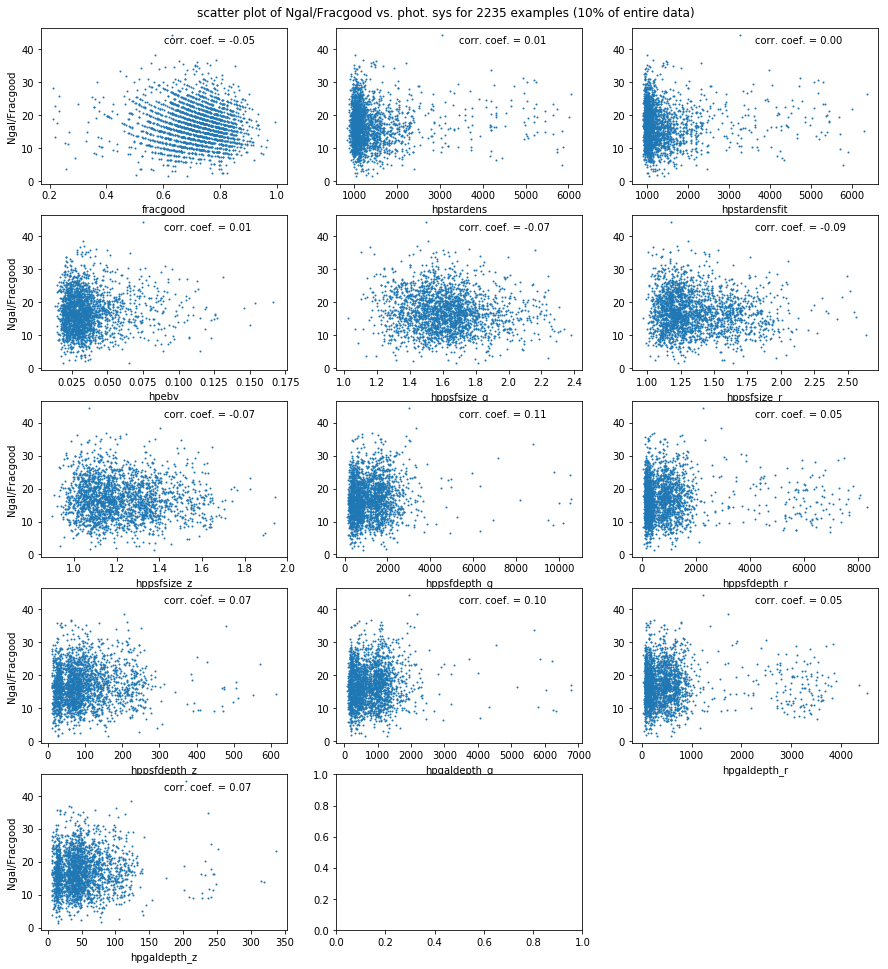

In [18]:
f,a = plt.subplots(ncols=3, nrows=5, figsize=(15, 15))
plt.suptitle("eBOSS full vtest")
a = a.flatten()
f.delaxes(a[-1])

plt.rc('axes.spines', right=False, top=False)
plt.rc('font', family='Times New Roman')
# plt.rcParams['axes.facecolor'] = 'white'
ind = np.random.choice(np.arange(0, outdata.size), size=outdata.size//10, replace=False)
plt.subplots_adjust(top=0.96)
plt.suptitle("scatter plot of Ngal/Fracgood vs. phot. sys for {} examples (10% of entire data)".format(ind.size))
for s in range(outdata['features'].shape[1]):
    l = outdata['label']
    f = outdata['features'][:,s]
    cf = sp.stats.pearsonr(f, l)[0]
    print(labels[s], "corr. coef. = %.2f"%cf)
    a[s].scatter(f[ind], l[ind], 1.0)
    a[s].set_xlabel(labels[s])
    a[s].text(0.5, 0.9, "corr. coef. = {:.2f}".format(cf), transform=a[s].transAxes)
    if s in [0, 3, 6, 9, 12]:a[s].set_ylabel("Ngal/Fracgood")

In [19]:
from sklearn.model_selection import KFold

In [20]:
def split2kfolds(data, k=4, shuffle=True):
    kfold = KFold(k, shuffle=shuffle)
    index = np.arange(data.size)
    kfold_data = {'test':{}, 'train':{}}
    for i, (trainID, testID) in enumerate(kfold.split(index)):
        foldname = 'fold'+str(i)
        kfold_data['test'][foldname] = data[testID]
        kfold_data['train'][foldname] = data[trainID]
    return kfold_data

In [21]:
data4fold = split2kfolds(outdata, k=4)

In [39]:
#mkdir /global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/data4fold/

In [22]:
# backup 
np.save('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/data4fold/test_train_eboss_4fold-wo-ndet', data4fold)

In [23]:
data_eboss = np.load('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/data4fold/test_train_eboss_4fold-wo-ndet.npy').item()

In [24]:
def scatterhpx(hpix, **kwargs):
    theta, phi = hp.pix2ang(256, hpix)
    ra  = np.degrees(phi)
    dec = np.degrees(np.pi/2 - theta)
    if hpix.size > 1000:
        n  = np.random.choice(np.arange(hpix.size), size=5000, replace=False)
        plt.scatter(ra[n], dec[n], **kwargs)
    else:
        plt.scatter(ra, dec, **kwargs)
    plt.xlabel('RA')
    plt.ylabel('DEC')

In [25]:
fold = 'fold0'
test = data_eboss['test'][fold]
train = data_eboss['train'][fold]

/global/homes/m/mehdi/cori-envs/py3p6/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


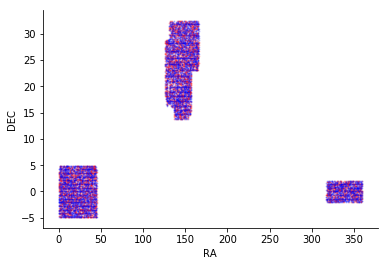

In [26]:
scatterhpx(test['hpix'], color='r', alpha=0.2, s=1.)
scatterhpx(train['hpix'], color='b', alpha=0.2, s=1.)

In [27]:
np.intersect1d(train['hpix'], test['hpix'])

array([], dtype=int64)

In [28]:
data_eboss['train']['fold0'].size

16767

In [1]:
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
files = glob('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/data4fold/wo-ndet/fold*/*')
files.sort()

In [3]:
files

['/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/data4fold/wo-ndet/fold0/reg-nepoch500-nchain10-batchsize2000units1010-Lrate0.01.npz',
 '/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/data4fold/wo-ndet/fold1/reg-nepoch500-nchain10-batchsize2000units1010-Lrate0.01.npz',
 '/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/data4fold/wo-ndet/fold2/reg-nepoch500-nchain10-batchsize2000units1010-Lrate0.01.npz',
 '/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/data4fold/wo-ndet/fold3/reg-nepoch500-nchain10-batchsize2000units1010-Lrate0.01.npz']

/global/homes/m/mehdi/cori-envs/py3p6/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


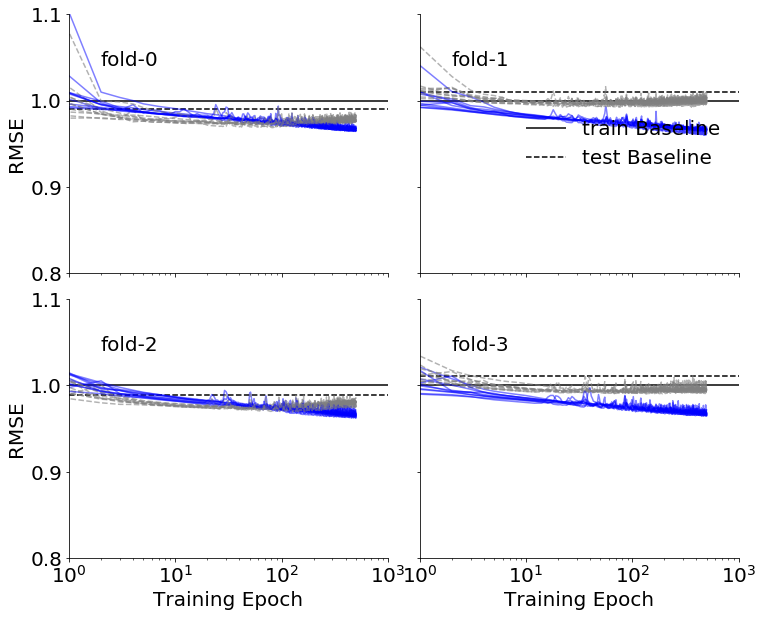

In [4]:
plt.rc('font', size=20, family='Times New Roman')
plt.rc('axes.spines', right=False, top=False)
f, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,10),
                     sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
ax = ax.flatten()
for j,file_i in enumerate(files):
    d = np.load(file_i)
    out = d['arr_0'].item()
    for i,rmse in enumerate(out['epoch_RMSEs']):
        if i == 0:
            ax[j].hlines(xmin=1,xmax=3000,y=out['options']['baselineRMSE'][0],
                         linestyles='-', label='train Baseline', alpha=1., color='k')
            ax[j].hlines(xmin=1,xmax=3000,y=out['options']['baselineRMSE'][1],
                         linestyles='--', label='test Baseline', alpha=1., color='k')

        ax[j].plot(rmse[-1][:,0], rmse[-1][:,1],ls='-',c='blue', alpha=0.5)
        ax[j].plot(rmse[-1][:,0], rmse[-1][:,2],ls='--',c='grey', alpha=0.6)
    ax[j].set_xscale('log')
    ax[j].text(0.1, 0.8, "fold-"+str(j), transform=ax[j].transAxes)
    if j==1:ax[j].legend(frameon=False, loc='center right')
    ax[j].set_ylim(0.8, 1.1)
#     ax[j].text(100, 1.02*rmse[2], "Baseline RMSE", color="k")
    if j in [0, 2]:ax[j].set_ylabel('RMSE')
    if j in [2, 3]:ax[j].set_xlabel('Training Epoch')
    ax[j].set_xlim(1, 1000)

In [5]:
"""
    Reading the Ngal and systematic
"""
p_true = []
x_true = []
y_true = []
y_pred = []
y_base = []
for j,file_i in enumerate(files):
    d = np.load(file_i)
    out = d['arr_0'].item()
    p_true.append(out['test'][0])
    x_true.append(out['test'][1])
    y_true.append(out['test'][2].squeeze())
    ybasei = np.ones(out['test'][2].shape[0])*np.mean(out['train'][2])
#     print(np.sqrt(np.mean((out['test'][2].squeeze() - ybasei)**2)), ybasei[0])
    y_base.append(ybasei)
    y_avg = []
    for i in range(len(out['chain_y'])):
        y_avg.append(out['chain_y'][i][1].squeeze().tolist())    
    meanY, stdY = out['options']['stats']['ystat']
    print(meanY, stdY)
    y_pred.append(stdY*np.mean(np.array(y_avg), axis=0) + meanY)

Ptrue = np.concatenate(p_true)
Xtrue = np.concatenate(x_true)
Ytrue = np.concatenate(y_true)
Ybase = np.concatenate(y_base)
Ypred = np.concatenate(y_pred)
print(Xtrue.shape, Ytrue.shape, Ypred.shape, Ybase.shape)

[ 17.03329405] [ 5.92700879]
[ 16.97527459] [ 5.89793006]
[ 17.04470435] [ 5.92839911]
[ 17.03960534] [ 5.89585891]
(22357, 13) (22357,) (22357,) (22357,)


/global/homes/m/mehdi/cori-envs/py3p6/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


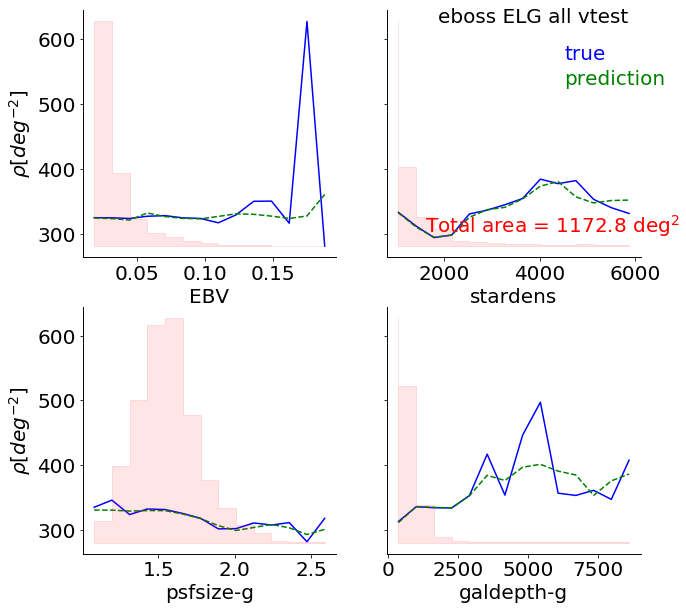

In [6]:
nside2pixarea =lambda nside: 4.*np.pi / (12*nside*nside) * 3282.80635
def get_nsys(sys, ngal, bins):
    npix,_ = np.histogram(sys, bins=bins)
    ngalp,_ = np.histogram(sys, bins=bins, weights=ngal)
    area = nside2pixarea(nside=256)
    avg  = np.sum(ngalp)/np.sum(npix)/area
    return 0.5*(bins[:-1]+bins[1:]), ngalp/npix/area, area*npix

def plot_ith(ax1, xlabel='EBV', index=0, nbins=20):
    xl=[]
    y1l =[]
    y2l = []
    bins = np.linspace(Xtrue[:,index].min(), Xtrue[:,index].max(), nbins)
    for x,y in [(Xtrue[:,index], Ytrue),(Xtrue[:,index], Ypred), (Xtrue[:,index], Ybase)]:
        x, y, a = get_nsys(x, y, bins)
        xl.append(x)
        y1l.append(y)
        y2l.append(a)
        
    ax2 = ax1.twinx()
    lt = ['-','--']
    c  = ['blue', 'green']
    ax2.fill_between(xl[0], y2l[0], color='red', alpha=0.1, step='pre')
    for i, label_i in enumerate(['true', 'prediction']):
        ax1.plot(xl[i], y1l[i], ls=lt[i], color=c[i], label=label_i)
        if index==1:ax1.text(0.7, 0.8-i*0.1, label_i, color=c[i], transform=ax1.transAxes)

    if index==1:
        ax2.text(0.15, 0.1, r'Total area = {:.1f} deg$^{}$'.format(np.sum(y2l[0]),2),
             transform=ax2.transAxes, fontsize=20, color='r')
    ax2.set_yticks([])
    ax1.set_xlabel(xlabel)
    #ax1.set_ylim(1500, 3500)
#    ax2.set_ylim(0, 500)
    
f, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 10), sharey=True)

ax = ax.flatten()
ax[1].text(0.2, 0.95, 'eboss ELG all vtest', transform=ax[1].transAxes)
plot_ith(ax[0], index=3, xlabel='EBV', nbins=15)
plot_ith(ax[1], index=1, xlabel='stardens', nbins=15)
plot_ith(ax[2], index=4, xlabel='psfsize-g', nbins=15)
plot_ith(ax[3], index=10, xlabel='galdepth-g', nbins=15)
for i in [0, 2]:ax[i].set_ylabel(r'$\rho [deg^{-2}]$')

In [35]:
from syslss import ngalsys

In [36]:
npix = 12*256**2
mask = np.zeros(npix)
mask[Ptrue] = 1.0
nstar  = np.zeros(npix)
nstar[Ptrue]  = Xtrue[:,1]  # nstar
ranmap2 = np.zeros(npix)
ranmap2[Ptrue] = Ypred
galmap = np.zeros(npix)
galmap[Ptrue] = Ytrue
ranmap1 = np.zeros(npix)
ranmap1[Ptrue] = Xtrue[:, 0] # fracgood

In [37]:
class systematic(object):
    def __init__(self, sysname, mask):
        df = sysname #ft.read(sysname, lower=True)
        self.HPIX = np.argwhere(~np.logical_not(mask)).flatten()
        self.SIGNAL = df[~np.logical_not(mask)]

In [38]:
nstar256 = systematic(nstar, mask)
nstarbin = np.linspace(Xtrue[:,1].min(), Xtrue[:,1].max(), 15)

In [39]:
eboss = ngalsys(galmap, 256,hpmap=True)
eboss.prepare_inputs(nstar256, selection_function=ranmap1, fracdet_c=-5000)
eboss.digitize_ngalsys(nstarbin)
eboss.processjack()

In [40]:
ebossai = ngalsys(galmap, 256,hpmap=True)
ebossai.prepare_inputs(nstar256, selection_function=ranmap2, fracdet_c=-5000)
ebossai.digitize_ngalsys(nstarbin)
ebossai.processjack()

In [41]:
np.array_equal(ebossai.ihpix, eboss.ihpix)

True

In [42]:
path = '/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/data4fold/wo-ndet/'

In [43]:
np.save(path+'eboss_dnstar', eboss.output)
np.save(path+'eboss_dnstar_ai', ebossai.output)

In [44]:
eb   = np.load(path+'eboss_dnstar.npy').item()
eb_ai = np.load(path+'eboss_dnstar_ai.npy').item()

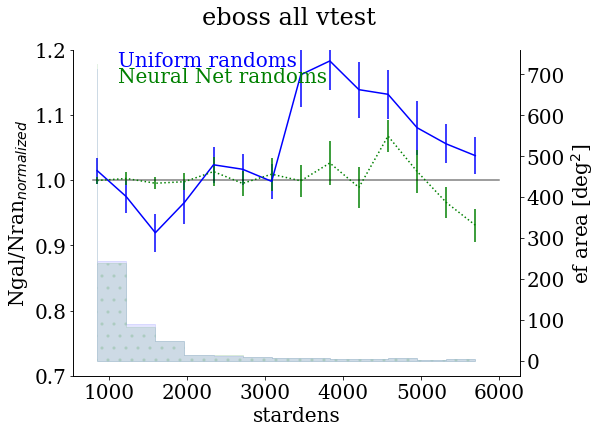

In [45]:
def helper(name):
    x = name['bin_edges'][:-1]
    y = name['delta']
    ye = name['delta_err']
    s = name['area']
    mask = y != 0.0
    x = x[mask]
    y = y[mask]
    ye = ye[mask]
    s  = s[mask]
    return x, y, ye, s
plt.rc('figure', figsize=(8,6))
plt.rc("axes.spines", top=False, right=True)
plt.rc("font",size=20, family='serif')
f,a = plt.subplots()
plt.suptitle('eboss all vtest')
a2 = a.twinx()
a2.set_ylabel(r'ef area [deg$^{2}$]')
a.set_ylabel(r'Ngal/Nran$_{normalized}$')
a.set_xlabel('stardens')
# a.set_xscale('log')
a.set_ylim(0.7, 1.2)
# a.set_xlim(0.01, 0.2)
c = ['b', 'g']
l = ['-',':']
h=['','.']
t = ['Uniform randoms','Neural Net randoms']
a.plot([800, 6000], [1, 1], 'k-', alpha=0.5)
for i,n in enumerate([eb, eb_ai]):
    x,y,ye,s = helper(n)
    a.errorbar(x, y, yerr=ye, c=c[i], linestyle=l[i])
    a.text(0.1, 0.95-i*0.05, t[i], transform=a.transAxes, color=c[i])
    a2.fill_between(x, s, step='pre', color=c[i], alpha=0.1, hatch=h[i])

In [46]:
random = ft.read('$SCRATCH/eboss/ebossv5_10_7/march12/eBOSS_ELG_full_ALL_vtest.ran.fits', 
               lower=True, columns=['ra', 'dec', 'probanymask', 'chunk'])
# ranmap = hpixsum(nside, random['ra'], random['dec'], value=1-random['probanymask'])

In [47]:
b'eboss21'+bytes('3', 'utf8')

b'eboss213'

In [48]:
ranmasks = []
for i in ['1', '2', '3', '5']:
#     print(b'eboss2'+bytes(i, 'utf8'))
    mask2i = random['chunk'] == b'eboss2'+bytes(i, 'utf8')
    ranmasks.append(hpixsum(nside, random['ra'][mask2i], 
                       random['dec'][mask2i], 
                       value=1-random['probanymask'][mask2i]).astype(np.bool))

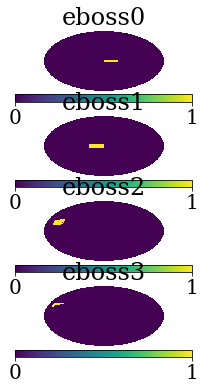

In [49]:
j = 0
for mask_i in ranmasks:
    plt.subplot(411+j)
    hp.mollview(mask_i, hold=True, title='eboss'+str(j))
    j += 1

In [50]:
d_nstarchunks=[]
for mask_i in ranmasks:
    nstarbin = np.linspace(nstar[mask_i].min(), nstar[mask_i].max(), 15)
    ebossai2i = ngalsys(galmap, 256,hpmap=True)
    ebossai2i.prepare_inputs(nstar256, selection_function=ranmap2, fracdet_c=-5000, mask=mask_i)
    ebossai2i.digitize_ngalsys(nstarbin)
    ebossai2i.processjack()
    d_nstarchunks.append(ebossai2i.output)

In [51]:
d_nstarchunks_uni=[]
for mask_i in ranmasks:
    nstarbin = np.linspace(nstar[mask_i].min(), nstar[mask_i].max(), 15)    
    eboss2i = ngalsys(galmap, 256,hpmap=True)
    eboss2i.prepare_inputs(nstar256, selection_function=ranmap1, fracdet_c=-5000, mask=mask_i)
    eboss2i.digitize_ngalsys(nstarbin)
    eboss2i.processjack()
    d_nstarchunks_uni.append(eboss2i.output)

In [52]:
np.save('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/data4fold/wo-ndet/diff_chunks', 
       dict(uniform=d_nstarchunks_uni, ai=d_nstarchunks))

n bins  12
2.79067085693
1.80479253348
0.0926722940364
0.0630557049253
1.66473458477
1.10140487524
1.39841794454
0.461385472482
1.73127407798
0.899207695385
0.0180871391553
5.74379354354
866.374790737 5631.43613979
n bins  12
10.325340374
37.8789499723
4.90426580599
0.894349008593
7.69553358912
1.96490508247
21.8354913387
32.1129547713
19.0116626956
6.92784682304
7.41996996487
4.95466146811
866.374790737 5631.43613979
n bins  5
0.986376753859
0.0230110751875
0.115668582855
0.369069929729
0.00529115493095
827.992152623 1195.9886649
n bins  5
0.105348962278
0.102178340661
0.0410542074796
3.00252258566e-05
0.214438152885
827.992152623 1195.9886649
n bins  9
0.0473391399019
0.0791506051124
0.138062386215
1.3081124943
3.45235787039
2.18601797159
0.432457761415
0.0289291490942
0.350075957377
923.395560128 2400.82845633
n bins  9
0.34182470498
3.08730765896
0.101398061989
0.000207936267338
6.25072589042
3.98018785105
0.149791054294
5.33514322832
2.4617076588
923.395560128 2400.82845633
n bins

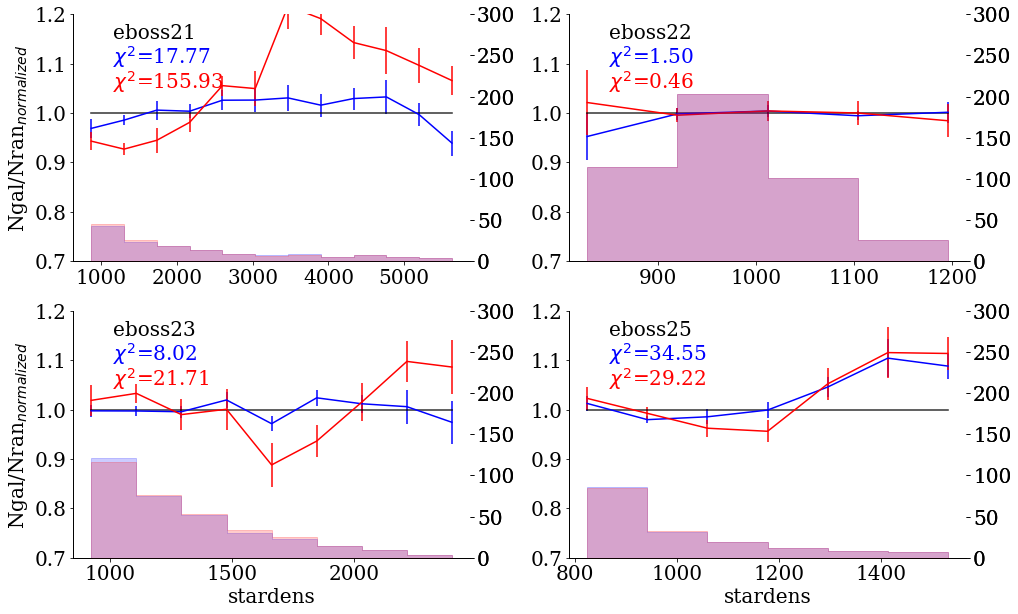

In [53]:
def helper(name):
    x = name['bin_edges'][:-1]
    y = name['delta']
    ye = name['delta_err']
    s = name['area']
    mask = (y != 0.0 ) & ~np.isnan(y) 
    x = x[mask]
    y = y[mask]
    ye = ye[mask]
    s  = s[mask]
    return x, y, ye, s

chi2 = lambda y, ye: np.sum(((y-1.0)/ye)**2)

def add_plot(ax, n, t, i, text=True, **kwargs):
    a2 = ax.twinx()
    x,y,ye,s = helper(n)
    ax.errorbar(x, y, yerr=ye,**kwargs)
    print('n bins ', len(x))
    for ii in range(x.size):
        print(((y[ii]-1)/ye[ii])**2)
    if text:ax.text(0.1, 0.9, t, transform=ax.transAxes, color='k')
    ax.text(0.1, 0.8-0.1*i, r'$\chi^{}$={:.2f}'.format(2, chi2(y, ye)),
           transform=ax.transAxes, **kwargs)
    a2.fill_between(x, s, step='pre', **kwargs, alpha=0.2)
#     if not ytick:
#         a2.set_yticks
    a2.set_ylim(0,300)
    ax.set_ylim(0.7, 1.2)
    print(x.min(), x.max())
    ax.plot([x.min(), x.max()], [1, 1], 'k-', alpha=0.5)


plt.rc('figure', figsize=(16,10))
plt.rc("axes.spines", top=False, right=False)
plt.rc("font",size=20, family='serif')
f,a = plt.subplots(ncols=2, nrows=2)
plt.subplots_adjust(wspace=0.25)
a = a.flatten()

# plt.suptitle('eboss all vtest')
# a.set_xlim(0.01, 0.2)
t = ['eboss21', 'eboss22', 'eboss23', 'eboss25']
for i,n in enumerate(range(len(d_nstarchunks))):
    add_plot(a[i], d_nstarchunks[i], t[i], 0, color='b')
    add_plot(a[i], d_nstarchunks_uni[i], t[i],1, color='r', text=False)
    if i in [0, 2]:a[i].set_ylabel(r'Ngal/Nran$_{normalized}$')
    if i in [2, 3]:a[i].set_xlabel('stardens')